In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from pathlib import Path
import xarray as xr
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MaxNLocator,FixedLocator


In [3]:
gc = pd.read_pickle('GEOS-Chem/Fire/GC_4x5_Daily_FIRE3')

gc.columns = ['lat', 'lon', 'hour', 'VCD', 'Fire', 'Time']

gc['Time'] = gc['Time'].astype(int)
# Southeast Asia
gc = gc[(gc['lat']>12)&(gc['lat']<28)&(gc['lon']>92.5)&(gc['lon']<107.5)]
gc['Year'] = [math.floor(a/100) for a in gc['Time']]

gc['Month'] = gc['Time']-202100
gc['Month'] = [a - 100 if a >100 else a for a in gc['Month']]
gc = gc.sort_values('Month')
gc['Month'] = gc['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:"Apr"})
gc['VCD'] = gc['VCD'] / 1e15
gc

,lat,lon,hour,VCD,Fire,Time,Year,Month
3047,26.0,105.0,23,4.919648,Flat,202101,2021,Jan
2658,22.0,100.0,18,6.372916,Diurnal,202101,2021,Jan
2659,22.0,100.0,19,6.336425,Diurnal,202101,2021,Jan
2660,22.0,100.0,20,6.306908,Diurnal,202101,2021,Jan
2661,22.0,100.0,21,6.261170,Diurnal,202101,2021,Jan
...,...,...,...,...,...,...,...,...
3042,26.0,105.0,18,13.173597,Diurnal,202104,2021,Apr
3041,26.0,105.0,17,12.984938,Diurnal,202104,2021,Apr
3040,26.0,105.0,16,12.736319,Diurnal,202104,2021,Apr
1900,14.0,95.0,4,6.151932,Diurnal,202104,2021,Apr


In [4]:
gemslis = []
for path in Path('GEMS/Monthly_05x0625/').rglob('*99.nc'):
    gemslis.append(str(path))
# for path in Path('./ZonalTableSEA1015/').rglob('*2022*.csv'):
#     lisSEA.append(str(path))
gemslis

['GEMS/Monthly_05x0625/GEMS_HCHO_2022062245_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2023070145_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2021040045_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2022080645_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2021100245_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2020120345_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2021072245_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2022110245_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2021090645_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2023042345_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2022050045_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2021100645_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2022080245_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2021040445_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2023070545_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2022020345_GCN_PL99.nc',
 'GEMS/Monthly_05x0625/GEMS_HCHO_2022050445_GCN_PL99.nc',
 'GEMS/Monthly

In [5]:
gems = pd.DataFrame(columns = ['lat','lon','HCHO_column','Month','Year','hour'])

for i in gemslis:
    dfT = xr.open_dataset(i,engine='netcdf4').to_dataframe().reset_index().dropna()
    dfT = dfT[(dfT['lat']>12)&(dfT['lat']<28)&(dfT['lon']>92.5)&(dfT['lon']<107.5)]
    
    dfT['Month']=int(str(i)[-18:-16])
    dfT['Year']=int(str(i)[-22:-18])
    dfT['hour']=int(str(i)[-16:-14])
                    
    gems = pd.concat([gems,dfT])
gems['Year'] = gems['Year'].astype(int)

gems['hour'] = gems['hour'].astype(int)+1
gems['hour'] = [a-24 if a>=24 else a for a in gems['hour']]
gems['Month'] = gems['Month'].astype(int)
gems = gems.sort_values('Month')

gems['Month'] = gems['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:"Apr"})

# gems = gems[(gems['lat']>12)&(gems['lat']<28)&(gems['lon']>92.5)&(gems['lon']<107.5)].dropna()

gems

,lat,lon,HCHO_column,Month,Year,hour
11163,27.5,106.875,10.323487,Jan,2021,5
9575,22.0,104.375,5.977219,Jan,2022,3
9577,22.0,105.625,4.563973,Jan,2022,3
9578,22.0,106.250,4.535073,Jan,2022,3
9579,22.0,106.875,5.233490,Jan,2022,3
...,...,...,...,...,...,...
9139,20.5,101.875,4.525909,NaN,2022,5
9140,20.5,102.500,3.782870,NaN,2022,5
9141,20.5,103.125,3.468639,NaN,2022,5
9000,20.0,105.000,4.012992,NaN,2022,5


In [6]:
gems['hour'] = gems['hour'] + 7
gc['hour'] = gc['hour'] + 7
gems['hour'] = [a-24 if a>=24 else a for a in gems['hour']]
gc['hour'] = [a-24 if a>=24 else a for a in gc['hour']]


In [7]:
gems = gems.dropna()

In [8]:
gc2021Spring = gc[(gc['Time']>202100)&(gc['Time']<202105)]
gc2021Spring

,lat,lon,hour,VCD,Fire,Time,Year,Month
3047,26.0,105.0,6,4.919648,Flat,202101,2021,Jan
2658,22.0,100.0,1,6.372916,Diurnal,202101,2021,Jan
2659,22.0,100.0,2,6.336425,Diurnal,202101,2021,Jan
2660,22.0,100.0,3,6.306908,Diurnal,202101,2021,Jan
2661,22.0,100.0,4,6.261170,Diurnal,202101,2021,Jan
...,...,...,...,...,...,...,...,...
3043,26.0,105.0,2,13.309926,Diurnal,202104,2021,Apr
3042,26.0,105.0,1,13.173597,Diurnal,202104,2021,Apr
3041,26.0,105.0,0,12.984938,Diurnal,202104,2021,Apr
3040,26.0,105.0,23,12.736319,Diurnal,202104,2021,Apr


In [9]:
gc2021Spring['Month'] = gc2021Spring['Time']-202100
gc2021Spring = gc2021Spring.sort_values('Month')
gc2021Spring['Month'] = gc2021Spring['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:"Apr"})
gc2021Spring

/var/folders/4y/knznw84s4p5d2d77tb6wyq6h0000gn/T/ipykernel_28470/4124082235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gc2021Spring['Month'] = gc2021Spring['Time']-202100


,lat,lon,hour,VCD,Fire,Time,Year,Month
3047,26.0,105.0,6,4.919648,Flat,202101,2021,Jan
2281,18.0,100.0,8,11.804669,None,202101,2021,Jan
2282,18.0,100.0,9,11.248053,None,202101,2021,Jan
2283,18.0,100.0,10,11.033964,None,202101,2021,Jan
1944,14.0,105.0,7,7.020572,None,202101,2021,Jan
...,...,...,...,...,...,...,...,...
2621,22.0,95.0,12,12.846798,None,202104,2021,Apr
2620,22.0,95.0,11,13.195924,None,202104,2021,Apr
2619,22.0,95.0,10,13.779987,None,202104,2021,Apr
2629,22.0,95.0,20,11.989828,None,202104,2021,Apr


In [10]:
gc2021Spring.columns = ['lat', 'lon', 'hour', 'VCD', 'Type', 'Time', 'Year', 'Month']
gc2021Spring = gc2021Spring[['lat', 'lon', 'hour', 'VCD', 'Type', 'Year', 'Month']]

In [11]:
gems21Spring = gems[gems['Year']==2021]
gems21Spring.columns = ['lat', 'lon', 'VCD', 'Month', 'Year', 'hour']
gems21Spring['Type']='GEMS'

/var/folders/4y/knznw84s4p5d2d77tb6wyq6h0000gn/T/ipykernel_28470/3505358120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gems21Spring['Type']='GEMS'


In [12]:
Spring21 = pd.concat([gc2021Spring,gems21Spring])


Text(0.02, 0.5, 'HCHO (10$^{15}$ molecules cm$^{-2}$)')

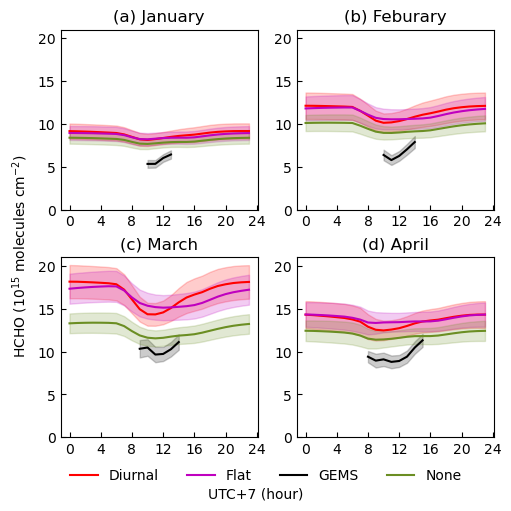

In [13]:
fig = plt.figure(layout="constrained", figsize=(5, 5))

gs = GridSpec(3, 2, figure=fig, 
              height_ratios=[4, 4,  0.5]
             )

# ax0 = fig.add_subplot(gs[3, :])
Spring21 = Spring21.sort_values('Type')

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

# bx = fig.add_subplot(gs[2, :])

axs = [ax1, ax2, ax3, ax4]
mons = ['Jan', 'Feb', 'Mar', 'Apr']
titles = ['(a) January','(b) Feburary','(c) March','(d) April']
lgd = True
for i in range(4):
    
    im = sns.lineplot(data=Spring21[Spring21['Month']==mons[i]], x = 'hour',y='VCD',hue='Type',errorbar=('sd',0.25)
                      ,ax=axs[i],legend=lgd, palette = ['r','m','k','olivedrab'])
    axs[i].set_ylim(0,21)
    axs[i].set_title(titles[i])
#     a.yaxis.set_major_locator(FixedLocator([0,5,10,15,20,25])) 
    axs[i].xaxis.set_major_locator(FixedLocator([0, 4,8,12,16,20,24]))
    axs[i].set_xlabel('', labelpad = 0.1,color='white')
    axs[i].set_ylabel('', labelpad = 0.1,color='white')
    axs[i].tick_params(direction = 'in')
    
    if (i ==0):
        
        fig.legend(loc='lower center', 
                   bbox_to_anchor=(0.52, 0.02),
                   title='', frameon=False,title_fontsize =1,markerscale=3,fontsize =10,ncol = 4
              ) # Witth,Height
        ax1.get_legend().remove()
    lgd = False
fig.supxlabel('UTC+7 (hour)',size=10)
fig.supylabel('HCHO (10$^{15}$ molecules cm$^{-2}$)',size=10)    
#         a.get_legend().remove()
# cbar = fig.colorbar(im, cax=bx, orientation='horizontal',label='GFED4s: kg km$^{-2}$ day$^{-1}$')